In [1]:
!pip3 install -U ucimlrepo 
!pip3 install pandas
!pip3 install seaborn

In [2]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
nursery = fetch_ucirepo(id=76) 

In [4]:
X = nursery.data.features 
y = nursery.data.targets 

In [5]:
print(nursery.metadata) 

{'uci_id': 76, 'name': 'Nursery', 'repository_url': 'https://archive.ics.uci.edu/dataset/76/nursery', 'data_url': 'https://archive.ics.uci.edu/static/public/76/data.csv', 'abstract': ' Nursery Database was derived from a hierarchical decision model originally developed to rank applications for nursery schools.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 12960, 'num_features': 8, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Sun Jan 14 2024', 'dataset_doi': '10.24432/C5P88W', 'creators': ['Vladislav Rajkovic'], 'intro_paper': {'title': 'An application for admission in public school systems', 'authors': 'M. Olave, V. Rajkovic, M. Bohanec', 'published_in': 'Expert Systems in Public Administration', 'year': 1989, 'url': 'https://www.academia.edu/16670755/An_applica

In [6]:
print(nursery.variables) 

       name     role         type demographic  \
0   parents  Feature  Categorical        None   
1  has_nurs  Feature  Categorical        None   
2      form  Feature  Categorical        None   
3  children  Feature  Categorical        None   
4   housing  Feature  Categorical        None   
5   finance  Feature  Categorical        None   
6    social  Feature  Categorical        None   
7    health  Feature  Categorical        None   
8     class   Target  Categorical        None   

                                         description units missing_values  
0                     usual, pretentious, great_pret  None             no  
1  proper, less_proper, improper, critical, very_...  None             no  
2            complete, completed, incomplete, foster  None             no  
3                                      1, 2, 3, more  None             no  
4                    convenient, less_conv, critical  None             no  
5                                 convenient, inconv 

In [7]:
nursery_df = pd.DataFrame(data=X, columns=nursery.data.feature_names)
nursery_df['target'] = y

In [8]:
nursery_df.head()

,parents,has_nurs,form,children,housing,finance,social,health,target
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [9]:
nursery_df['target'].value_counts()

target
not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: count, dtype: int64

In [10]:
nursery_c_df = nursery_df.copy().dropna()
nursery_c_df = nursery_c_df[~nursery_c_df['target'].str.contains('very_recom|recommend')]

In [11]:
nursery_c_df

,parents,has_nurs,form,children,housing,finance,social,health,target
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [12]:
nursery_c_df['target'].value_counts()

target
not_recom     4320
priority      4266
spec_prior    4044
Name: count, dtype: int64

In [13]:
nursery_encoded = pd.get_dummies(nursery_c_df, columns=['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health'],dtype='int', drop_first=True)
nursery_encoded = nursery_encoded.drop('target', axis=1)  

In [14]:
nursery_encoded

,parents_pretentious,parents_usual,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_completed,form_foster,form_incomplete,children_2,children_3,children_more,housing_critical,housing_less_conv,finance_inconv,social_problematic,social_slightly_prob,health_priority,health_recommended
1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0
12956,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
12957,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,1,0,0,1
12958,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,1,0,1,0


In [15]:
nursery_encoded.columns

Index(['parents_pretentious', 'parents_usual', 'has_nurs_improper',
       'has_nurs_less_proper', 'has_nurs_proper', 'has_nurs_very_crit',
       'form_completed', 'form_foster', 'form_incomplete', 'children_2',
       'children_3', 'children_more', 'housing_critical', 'housing_less_conv',
       'finance_inconv', 'social_problematic', 'social_slightly_prob',
       'health_priority', 'health_recommended'],
      dtype='object')

In [16]:
X = nursery_encoded
y = nursery_c_df['target'].astype('category').cat.codes

In [17]:
# Split data : 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Scale data : 

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Apply SVC model linear (same as SMV but for classification)

In [22]:
svc = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [23]:
y_pred_linear = svc.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Linear Kernel Accuracy:", accuracy_linear)

Linear Kernel Accuracy: 0.9489311163895487


In [24]:
print("Linear Kernel Classification Report:")
print(classification_report(y_test,y_pred_linear))

Linear Kernel Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       896
           1       0.92      0.93      0.93       861
           2       0.92      0.91      0.92       769

    accuracy                           0.95      2526
   macro avg       0.95      0.95      0.95      2526
weighted avg       0.95      0.95      0.95      2526



In [25]:
cv_scores = cross_val_score(svc, X_train_scaled, y_train, cv=5)

In [26]:
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.93320139 0.93617021 0.9351806  0.93369619 0.94207921]
Mean CV Accuracy: 0.9360655199611994


In [27]:
import numpy as np

In [28]:
column_names = [
    'parents_pretentious', 'parents_usual', 'has_nurs_improper',
       'has_nurs_less_proper', 'has_nurs_proper', 'has_nurs_very_crit',
       'form_completed', 'form_foster', 'form_incomplete', 'children_2',
       'children_3', 'children_more', 'housing_critical', 'housing_less_conv',
       'finance_inconv', 'social_problematic', 'social_slightly_prob',
       'health_priority', 'health_recommended']
   


In [29]:
if svc.kernel == 'linear':
    print("The SVM model is using a linear kernel.")
elif svc.kernel == 'poly':
    print("The SVM model is using a polynomial kernel.")
else:
    print("The SVM model is using a different kernel.")
    
for coefficients in svc.coef_: 
    coef_dict = dict(zip(column_names, coefficients))
    coef_list = []
    
    # Print the feature importances with column names
    for feature, coef in coef_dict.items():
        print(f"{feature}: {coef}")
        coef_list.append({feature: coef})
    # sorted_list = sorted(coef_list, key=lambda x: list(x.values())[0], reverse=True)
    # sorted_list
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')


The SVM model is using a linear kernel.
parents_pretentious: 0.0
parents_usual: 0.0
has_nurs_improper: 0.0
has_nurs_less_proper: 0.0
has_nurs_proper: 0.0
has_nurs_very_crit: 5.551115123125783e-17
form_completed: -1.1102230246251565e-16
form_foster: 0.0
form_incomplete: 0.0
children_2: 0.0
children_3: 0.0
children_more: 0.0
housing_critical: 0.0
housing_less_conv: 0.0
finance_inconv: 0.0
social_problematic: 2.220446049250313e-16
social_slightly_prob: 1.1102230246251565e-16
health_priority: -0.9497710975190805
health_recommended: -0.931084115676889
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
parents_pretentious: 4.7607916895842095e-05
parents_usual: 7.557524888109068e-05
has_nurs_improper: 0.0001570427620561088
has_nurs_less_proper: 0.00013689401498540033
has_nurs_proper: 0.00011311407152891917
has_nurs_very_crit: 0.00011941411701005267
form_completed: 0.0
form_foster: -1.4974183411509134e-05
form_incomp

In [30]:
coefficients

array([ 1.17729003e+00,  1.98995268e+00,  8.53520398e-01,  1.82796743e+00,
        1.81862792e+00, -6.06267159e-01, -1.62634590e-01, -4.33908606e-01,
       -2.71585387e-01, -3.23281210e-01, -5.98138414e-01, -5.99652430e-01,
       -8.31907846e-01, -5.29776924e-01, -3.12846338e-01, -6.52434486e-01,
       -1.78002542e-04, -4.36361433e-01,  4.45119552e-01])

In [31]:
features3 = [
  'parents_pretentious', 'parents_usual', 'has_nurs_improper',
       'has_nurs_less_proper', 'has_nurs_proper', 'has_nurs_very_crit',
       'form_completed', 'form_foster', 'form_incomplete', 'children_2',
       'children_3', 'children_more', 'housing_critical', 'housing_less_conv',
       'finance_inconv', 'social_problematic', 'social_slightly_prob',
       'health_priority', 'health_recommended']


coefficients3 = [
    1.17729003e+00,  1.98995268e+00,  8.53520398e-01,  1.82796743e+00,
        1.81862792e+00, -6.06267159e-01, -1.62634590e-01, -4.33908606e-01,
       -2.71585387e-01, -3.23281210e-01, -5.98138414e-01, -5.99652430e-01,
       -8.31907846e-01, -5.29776924e-01, -3.12846338e-01, -6.52434486e-01,
       -1.78002542e-04, -4.36361433e-01,  4.45119552e-01]


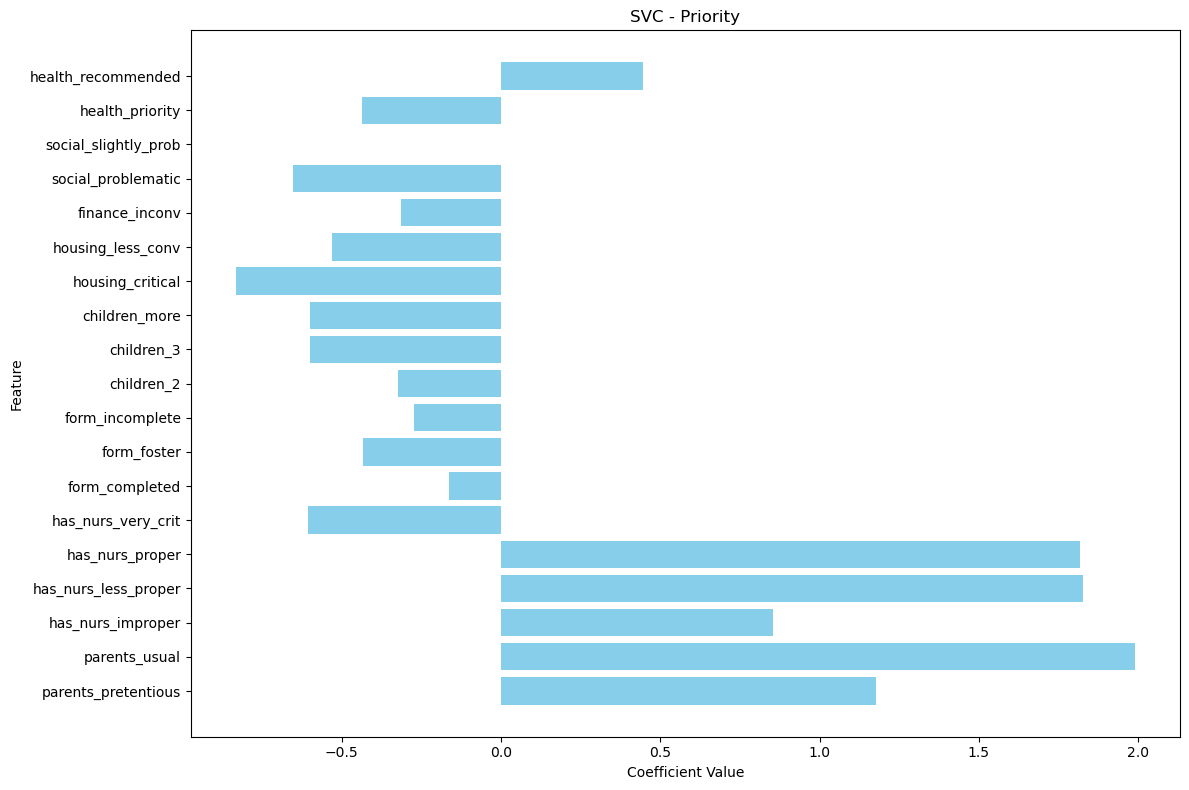

In [32]:
plt.figure(figsize=(12, 8))
plt.barh(features3, coefficients3, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('SVC - Priority')
plt.tight_layout()
plt.show()

In [33]:
# Apply SVC model Poly 

In [34]:
# Initialize and train the SVC model with Polynomial kernel
svc_p = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
svc_p.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

In [35]:
y_pred_poly = svc_p.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Polynomial Kernel Accuracy:", accuracy_poly)

print("Polynomial Kernel Classification Report:")
print(classification_report(y_test, y_pred_poly))

Polynomial Kernel Accuracy: 0.9992082343626286
Polynomial Kernel Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       896
           1       1.00      1.00      1.00       861
           2       1.00      1.00      1.00       769

    accuracy                           1.00      2526
   macro avg       1.00      1.00      1.00      2526
weighted avg       1.00      1.00      1.00      2526



In [36]:
cv_scores = cross_val_score(svc_p, X_train_scaled, y_train, cv=5)

In [37]:
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.99356754 0.99505195 0.99307274 0.99505195 0.9950495 ]
Mean CV Accuracy: 0.9943587381994015


In [38]:
# Confusion matrix - Linear

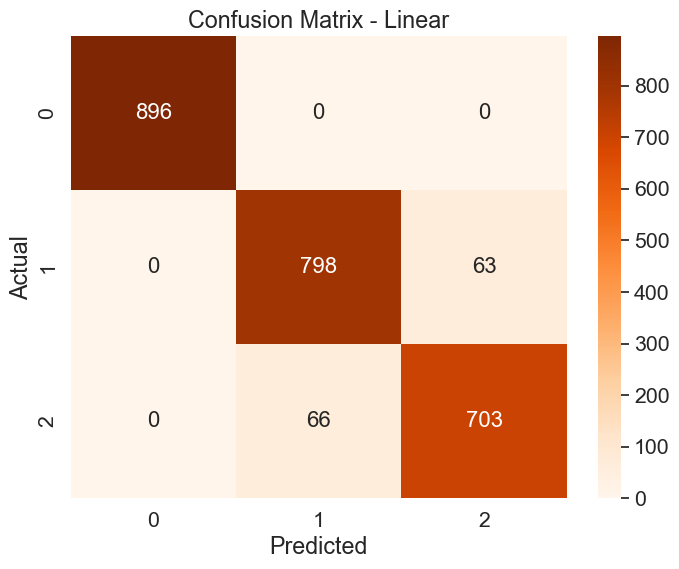

In [39]:
cm = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Linear')
plt.show()

In [40]:
# Confusion matrix - Poly

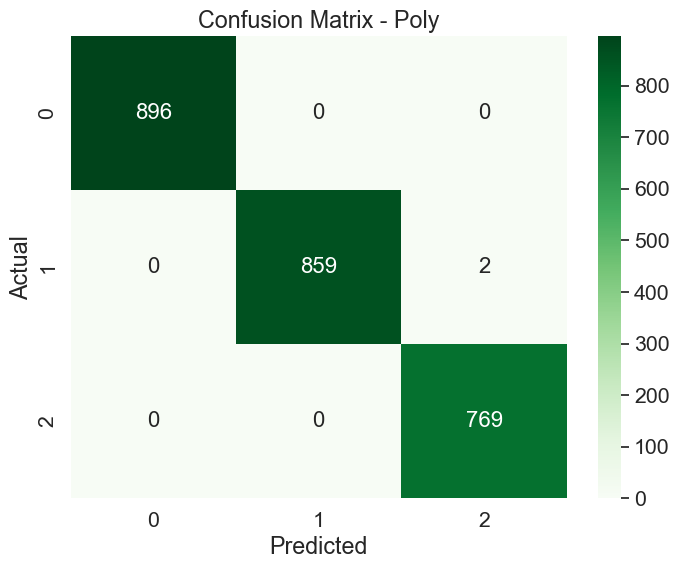

In [41]:
cm = confusion_matrix(y_test, y_pred_poly)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Poly')
plt.show()